In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# read the Dataset
df = pd.read_csv('ab_elearning_actions.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [4]:
# select dtype except number
for col in df.select_dtypes(exclude=np.number):
    print('-'*10,col,'-'*10 )
    print(df[col].unique())

---------- timestamp ----------
['2017-01-21 22:11:48.556739' '2017-01-12 08:01:45.159739'
 '2017-01-11 16:55:06.154213' ... '2017-01-22 11:45:03.439544'
 '2017-01-15 01:20:28.957438' '2017-01-16 12:40:24.467417']
---------- group ----------
['control' 'treatment']
---------- landing_page ----------
['old_page' 'new_page']


In [5]:
#check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [6]:
# check null
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [8]:
# describe converted column
df['converted'].describe()

count    294478.000000
mean          0.119659
std           0.324563
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: converted, dtype: float64

In [9]:
# check user_id duplicated
df['user_id'].duplicated().sum()

3894

In [12]:
#check new page with control
control_mask = (df['group'] == 'control')&(df['landing_page'] == 'new_page')
control_mask.sum()

1928

In [13]:
#check old page with treatment
treatment_mask = (df['group'] == 'treatment')&(df['landing_page'] == 'old_page')
treatment_mask.sum()

1965

## Data Wrangling

In [18]:
#droping duplicated users
user_duplicated_mask = df['user_id'].duplicated()
df[user_duplicated_mask].sort_values('user_id')

,user_id,timestamp,group,landing_page,converted
230259,630052,2017-01-17 01:16:05.208766,treatment,new_page,0
251762,630126,2017-01-19 17:16:00.280440,treatment,new_page,0
183371,630137,2017-01-20 02:08:49.893878,control,old_page,0
255753,630320,2017-01-12 05:27:37.181803,treatment,old_page,0
110634,630471,2017-01-23 01:42:51.501851,control,old_page,0
...,...,...,...,...,...
243428,945627,2017-01-17 15:43:17.255322,treatment,new_page,1
144693,945645,2017-01-08 22:56:13.599712,control,old_page,0
142354,945703,2017-01-08 19:40:51.169351,control,new_page,0
186960,945797,2017-01-13 17:23:21.750962,control,old_page,0


In [19]:
df[df['user_id'] == 630052]

,user_id,timestamp,group,landing_page,converted
213114,630052,2017-01-07 12:25:54.089486,treatment,old_page,1
230259,630052,2017-01-17 01:16:05.208766,treatment,new_page,0


In [20]:
df[df['user_id'] == 630126]

,user_id,timestamp,group,landing_page,converted
22513,630126,2017-01-14 13:35:54.778695,treatment,old_page,0
251762,630126,2017-01-19 17:16:00.280440,treatment,new_page,0


In [45]:
mask = ((df['group'] == 'treatment') & (df['landing_page'] == 'new_page')) | ((df['group'] == 'control') & (df['landing_page'] =='old_page'))
df2 = df[mask].copy()

In [46]:
df2['user_id'].duplicated().sum()

1

In [47]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [48]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [49]:
# drop duplicated row
df2.drop(index=2893,inplace=True)

## A/B Testing

$$H_0: p_{new} - p_{old} \leq 0$$

$$H_1: p_{new} - p_{old} \gt 0$$

In [56]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [67]:
# calculating probabilty of old and new page converted
p_old = df2['converted'].mean()
print(p_old)

p_new = df2['converted'].mean()
print(p_new)

0.11959708724499628
0.11959708724499628


In [68]:
# count of new page and old page
n_new = len(df2[df2['landing_page'] == 'new_page'])
print('count of new page =',n_new)

n_old = len(df2[df2['landing_page'] == 'old_page'])
print('count of old page =',n_old)

count of new page = 145310
count of old page = 145274


In [69]:
#sampling
new_page_converted = np.random.choice(2, size=n_new, p=[0.8804,0.1196])
new_page_converted

array([0, 0, 0, ..., 1, 0, 0])

In [70]:
old_page_converted = np.random.choice(2, size=n_old, p=[0.8804,0.1196])

In [71]:
# mean difference between new page and old page
np.mean(new_page_converted) - np.mean(old_page_converted)

0.00032155952561734036

In [72]:
# Bootstraping
new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new
old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_page_converted - old_page_converted 

Wall time: 3.99 ms


In [73]:
obs_diff = df2[df2['landing_page'] == 'new_page']['converted'].mean() - df2[df2['landing_page'] == 'old_page']['converted'].mean()
obs_diff

-0.0015782389853555567

Text(0.5, 0, 'difference')

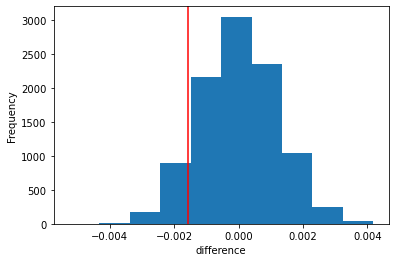

In [77]:
plt.hist(p_diffs)
plt.axvline(obs_diff,c='r')
plt.ylabel('Frequency')
plt.xlabel('difference')

In [81]:
p_value = (p_diffs > obs_diff).mean()
p_value

0.9026

**P_value whic is equal 0.9026 is greater than alpha 0.05. Therefore we fail to reject the null hypothesis**

In [78]:
import statsmodels.api as sm

convert_old = df2[df2['landing_page'] == 'old_page']['converted'].sum()
convert_new = df2[df2['landing_page'] == 'new_page']['converted'].sum()
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]
n_new = df2[df2['landing_page'] == 'new_page'].shape[0]

In [79]:
sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')

(-1.3109241984234394, 0.9050583127590245)

**The calculated Z_score above which = -1.311 is below the threshold of typeI error rate 5% which equivilant to z_score = 1.96, and also the p_value calculated= 0.905 which is greater than 0.05 error rate, so we again fail to reject the null hypothesis that the new_page has a greater effect that old_page**